In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('train.csv')
data.shape

(161393, 16)

In [ ]:
data.head()

,property_id,location_id,RowID,no_of_bathrooms,degree_of_latitude,degree_of_longitude,no_of_bedrooms,space_occupied,listing_purpose,category_property,listing_date,estate_agency,salesperson,area,has_garage,price
0,13845428,3847,30000,7.0,31.526751,74.337072,7.0,1 Kanal,For Rent,Houseo,2019-02-24 00:00:00,Raja Real Estate,Raja Adeeb,"Gulberg, Lahore, Punjab",False,300000
1,13851899,1487,30001,6.0,31.502385,74.414506,6.0,10 Marla,For Rent,House,2019-07-24 00:00:00,Dream Developers & Property Consultants,Ali Auwn,"Divine Gardens, Lahore, Punjab",False,90000
2,13852192,1447,30002,NaN,31.462493,74.409342,NaN,4 Marla,For Rent,Room,2018-12-26 00:00:00,Property Channel,Abbas Ali,"DHA Defence, Lahore, Punjab",True,15000
3,13855250,1006,30003,3.0,31.432105,74.349117,2.0,4 Marla,For Rent,Lower Portion,2019-06-24 00:00:00,Syed Associates & Builders,Syed Talha,"Pak Arab Housing Society, Lahore, Punjab",False,21000
4,13855556,1006,30004,6.0,31.432105,74.349117,4.0,5 Marla,For Rent,House,2019-07-18 00:00:00,Syed Associates & Builders,Syed Talha,"Pak Arab Housing Society, Lahore, Punjab",True,43000


Checking null values

In [ ]:
data.isna().sum()

property_id                0
location_id                0
RowID                      0
no_of_bathrooms        32188
degree_of_latitude         0
degree_of_longitude        0
no_of_bedrooms         16076
space_occupied             0
listing_purpose            0
category_property          0
listing_date               0
estate_agency          26693
salesperson            26694
area                       0
has_garage                 0
price                      0
dtype: int64

Statistical Summary

In [ ]:
data.describe()

,property_id,location_id,RowID,no_of_bathrooms,degree_of_latitude,degree_of_longitude,no_of_bedrooms,price
count,1.613930e+05,161393.000000,161393.000000,129205.000000,161393.000000,161393.000000,145317.000000,1.613930e+05
mean,1.654068e+07,4208.938721,110696.000000,4.350877,30.144402,71.624363,4.511881,1.601061e+07
std,9.097508e+05,3722.295030,46590.290335,3.042576,3.611373,3.062291,2.410218,3.315886e+07
min,1.380088e+07,1.000000,30000.000000,1.000000,24.749425,31.389173,1.000000,0.000000e+00
25%,1.607807e+07,1058.000000,70348.000000,1.000000,25.005301,67.182856,3.000000,7.500000e+04
50%,1.693916e+07,3226.000000,110696.000000,5.000000,31.463957,73.080232,4.000000,7.000000e+06
75%,1.721472e+07,7156.000000,151044.000000,6.000000,33.550869,74.242845,6.000000,1.770000e+07
max,1.769386e+07,14246.000000,191392.000000,485.000000,33.824600,75.084804,86.000000,2.000000e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161393 entries, 0 to 161392
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   property_id          161393 non-null  int64  
 1   location_id          161393 non-null  int64  
 2   RowID                161393 non-null  int64  
 3   no_of_bathrooms      129205 non-null  float64
 4   degree_of_latitude   161393 non-null  float64
 5   degree_of_longitude  161393 non-null  float64
 6   no_of_bedrooms       145317 non-null  float64
 7   space_occupied       161393 non-null  object 
 8   listing_purpose      161393 non-null  object 
 9   category_property    161393 non-null  object 
 10  listing_date         161393 non-null  object 
 11  estate_agency        134700 non-null  object 
 12  salesperson          134699 non-null  object 
 13  area                 161393 non-null  object 
 14  has_garage           161393 non-null  bool   
 15  price            

Imputing null values

In [ ]:
data['no_of_bathrooms']=data['no_of_bathrooms'].fillna(data['no_of_bathrooms'].median())
data['no_of_bedrooms']=data['no_of_bedrooms'].fillna(data['no_of_bedrooms'].median())
data['estate_agency']=data['estate_agency'].fillna(data['estate_agency'].mode()[0])
data['salesperson']=data['salesperson'].fillna(data['salesperson'].mode()[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x796d230ed750>,
 'caps': [<matplotlib.lines.Line2D at 0x796d230edc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x796d230ed4b0>],
 'medians': [<matplotlib.lines.Line2D at 0x796d230ee1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x796d230ee470>],
 'means': []}

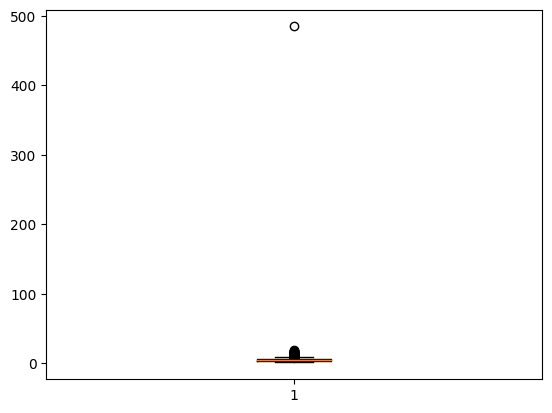

In [ ]:
plt.boxplot(data['no_of_bathrooms'])

Removing outliers using IQR

In [ ]:
q3=data['no_of_bathrooms'].quantile(0.75)
q1=data['no_of_bathrooms'].quantile(0.25)

In [ ]:
iqr=q3-q1
iqr

3.0

In [ ]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr

In [ ]:
data['bathrooms'] = data['no_of_bathrooms'].apply(lambda x: x if x < upper else None)

In [ ]:
#removing from bedrooms
q1=data['no_of_bedrooms'].quantile(0.25)
q3=data['no_of_bedrooms'].quantile(0.75)
iqr=q3-q1
upperr=q3+1.5*iqr
lowerr=q1-1.5*iqr

In [ ]:
data['bedrooms']=data['no_of_bedrooms'].apply(lambda x:x if x < upperr else None)

In [ ]:
data['category_property'].value_counts()

category_property
House            89821
Flat             29820
Upper Portion    14700
Lower Portion     9380
Room               704
                 ...  
Penthousei           1
Farm Houser          1
Farm Houseg          1
Penthouseg           1
Farm Housed          1
Name: count, Length: 167, dtype: int64

In [ ]:
data.drop(columns=['no_of_bathrooms','no_of_bedrooms'], axis=1)

,property_id,location_id,RowID,degree_of_latitude,degree_of_longitude,space_occupied,listing_purpose,category_property,listing_date,estate_agency,salesperson,area,has_garage,price,bathrooms,bedrooms
0,13845428,3847,30000,31.526751,74.337072,1 Kanal,For Rent,Houseo,2019-02-24 00:00:00,Raja Real Estate,Raja Adeeb,"Gulberg, Lahore, Punjab",False,300000,7.0,7.0
1,13851899,1487,30001,31.502385,74.414506,10 Marla,For Rent,House,2019-07-24 00:00:00,Dream Developers & Property Consultants,Ali Auwn,"Divine Gardens, Lahore, Punjab",False,90000,6.0,6.0
2,13852192,1447,30002,31.462493,74.409342,4 Marla,For Rent,Room,2018-12-26 00:00:00,Property Channel,Abbas Ali,"DHA Defence, Lahore, Punjab",True,15000,5.0,4.0
3,13855250,1006,30003,31.432105,74.349117,4 Marla,For Rent,Lower Portion,2019-06-24 00:00:00,Syed Associates & Builders,Syed Talha,"Pak Arab Housing Society, Lahore, Punjab",False,21000,3.0,2.0
4,13855556,1006,30004,31.432105,74.349117,5 Marla,For Rent,House,2019-07-18 00:00:00,Syed Associates & Builders,Syed Talha,"Pak Arab Housing Society, Lahore, Punjab",True,43000,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161388,17468383,174,191388,33.668497,73.074160,12.4 Marla,For Rent,Upper Portion,2019-07-24 00:00:00,Property World,Zafran,"I-8, Islamabad, Islamabad Capital",False,70000,1.0,4.0
161389,17468384,174,191389,33.668497,73.074160,12.4 Marla,For Rent,Upper Portion,2019-07-24 00:00:00,Property World,Zafran,"I-8, Islamabad, Islamabad Capital",True,40000,1.0,3.0
161390,17468482,167,191390,33.676104,73.013842,1 Kanal,For Rent,House,2019-07-24 00:00:00,Azaan Associates,Usman Rehman,"G-10, Islamabad, Islamabad Capital",False,160000,8.0,4.0
161391,17468586,339,191391,33.527944,73.161392,2.7 Marla,For Rent,Flat,2019-07-24 00:00:00,New National Properties,TALHA MIAN AHMAD,"DHA Defence, Islamabad, Islamabad Capital",False,25000,3.0,3.0


Mapping categories to 1 category

In [ ]:
#mapping house
def map_house(category):
  if category in ['Housea','housee','Houseb','Housec','Housed','Housee','Housef','Houseg','Househ','Housei','Housej','Housek','Housel','Housem','Housen','Houseo','Housep','Houseq','Houser','Houses','Houset','Houseu','Housev','Housew','Housex','Housey','Housez']:
       return 'house'
  else:
      return category
data['category_property']=data['category_property'].map(map_house)

In [ ]:
#map flat
def map_flat(category):
  if category in ['Flata','Flatb','Flatc','Flatd','Flate','Flatf','Flatg','Flath','Flati','Flatj','Flatk','Flatl','Flatm','Flatn','Flato','Flatp','Flatq','Flatr','Flats','Flatt','Flatu','Flatv','Flatw','Flatx','Flaty','Flatz']:
    return 'Flat'
  else:
    return category
data['category_property']=data['category_property'].map(map_flat)

In [ ]:
#map farm house
def map_farm(category):
  if category in ['Farm Housea','Farm Houseb','Farm Housec','Farm Housed','Farm Housee','Farm Housef','Farm Houseg','Farm Househ','Farm Housei','Farm Housej','Farm Housek','Farm Housel','Farm Housem','Farm Housen','Farm Houseo','Farm Housep','Farm Houseq','Farm Houser','Farm Houses','Farm Houset','Farm Houseu','Farm Housev','Farm Housew','Farm Housex','Farm Housey','Farm Housez']:
    return 'Farm House'
  else:
    return category
data['category_property']=data['category_property'].map(map_farm)

In [ ]:
#upper portion
def upper(category):
  if category in ['Upper Portiona','Upper Portionb','Upper Portionc','Upper Portiond','Upper Portione','Upper Portionf','Upper Portiong','Upper Portionh','Upper Portioni','Upper Portionj','Upper Portionk','Upper Portionl','Upper Portionm','Upper Portionn','Upper Portiono','Upper Portionp','Upper Portionq','Upper Portionr','Upper Portions','Upper Portiont','Upper Portionu','Upper Portionv','Upper Portionw','Upper Portionx','Upper Portiony','Upper Portionz']:
    return 'Upper Portion'
  else:
    return category
data['category_property']=data['category_property'].map(upper)

In [ ]:
#lower portion
def lower(category):
  if category in ['Lower Portiona','Lower Portionb','Lower Portionc','Lower Portiond','Lower Portione','Lower Portionf','Lower Portiong','Lower Portionh','Lower Portioni','Lower Portionj','Lower Portionk','Lower Portionl','Lower Portionm','Lower Portionn','Lower Portiono','Lower Portionp','Lower Portionq','Lower Portionr','Lower Portions','Lower Portiont','Lower Portionu','Lower Portionv','Lower Portionw','Lower Portionx','Lower Portiony','Lower Portionz']:
    return 'Lower Portion'
  else:
    return category
data['category_property']=data['category_property'].map(lower)

In [ ]:
#room
def room(category):
  if category in ['Rooma','Roomb','Roomc','Roomd','Roome','Roomf','Roomg','Roomh','Roomi','Roomj','Roomk','Rooml','Roomm','Roomn','Roomo','Roomp','Roomq','Roomr','Rooms','Roomt','Roomu','Roomv','Roomw','Roomx','Roomy','Roomz']:
    return 'Room'
  else:
    return category
data['category_property']=data['category_property'].map(room)

In [ ]:
#pent
def pent(category):
  if category in ['Penthousea','Penthouseb','Penthousec','Penthoused','Penthousee','Penthousef','Penthouseg','Penthouseh','Penthousei','Penthousej','Penthousek','Penthousel','Penthousem','Penthousen','Penthouseo','Penthousep','Penthouseq','Penthouser','Penthouses','Penthouset','Penthouseu','Penthousev','Penthousew','Penthousex','Penthousey','Penthousez']:
    return 'Penthouse'
  else:
    return category
data['category_property']=data['category_property'].map(pent)

In [ ]:
data['category_property'].value_counts()

category_property
House            89821
Flat             33133
Upper Portion    16299
Lower Portion    10374
house            10110
Room               800
Farm House         571
Penthouse          285
Name: count, dtype: int64

Selecting only top 10 categories

In [ ]:
#top 10 for estate agency
agency=data['estate_agency'].value_counts().head(10)
#creating data frame to store top 10
agency=pd.DataFrame(agency)
#resetting index so that it becomes a column
agency.reset_index(inplace=True)
#replaceing to others if not in top 10
data['estate_agency']=data['estate_agency'].apply(lambda x:x if x in agency['estate_agency'].values else 'Other')

In [ ]:
#top 10 salesman
salesman=data['salesperson'].value_counts().head(10)
salesman=pd.DataFrame(salesman)
salesman.reset_index(inplace=True)
data['salesperson']=data['salesperson'].apply(lambda x:x if x in salesman['salesperson'].values else 'Others')

Encoding categorical column

In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
data['salesperson']=scaler.fit_transform(data['salesperson'])
data['estate_agency']=scaler.fit_transform(data['estate_agency'])
data['space_occupied']=scaler.fit_transform(data['space_occupied'])
data['listing_purpose']=scaler.fit_transform(data['listing_purpose'])
data['category_property']=scaler.fit_transform(data['category_property'])
data['listing_date']=scaler.fit_transform(data['listing_date'])
data['area']=scaler.fit_transform(data['area'])

In [ ]:
data.dropna(inplace=True)

In [ ]:
x=data.drop(columns=['price','no_of_bathrooms','no_of_bedrooms'], axis=1)
y=data['price']

splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor(max_depth=8, min_samples_split=60, random_state=42)
d.fit(x_train,y_train)
print('train {:.2f}' , d.score(x_train,y_train))
print('test {:.2f}' , d.score(x_test,y_test))

train {:.2f} 0.7281711645776023
test {:.2f} 0.6797473870987962


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
g=GradientBoostingRegressor(n_estimators=150,max_depth=8, min_samples_split=50,random_state=42)
g.fit(x_train,y_train)
print('train {:.2f}' , g.score(x_train,y_train))
print('test {:.2f}' , g.score(x_test,y_test))

train {:.2f} 0.912401527852036
test {:.2f} 0.8010544105181844


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=150, max_depth=11, min_samples_split=17,random_state=42)
r.fit(x_train, y_train)
print('train score', r.score(x_train,y_train))
print('test score', r.score(x_test,y_test))

train score 0.8321963563263535
test score 0.7666991560303126
